# Биномиальный критерий для доли

In [2]:
import numpy as np
from scipy import stats

In [3]:
%pylab inline

/Library/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


## Shaken, not stirred

Джеймс Бонд говорит, что предпочитает мартини смешанным, но не взболтанным. Проведём слепой тест (blind test): n раз предложим ему пару напитков и выясним, какой из двух он предпочитает:

* **выборка** - бинарный вектор длины $n$, где 1 - Джеймс Бонд предпочел смешанный напиток, 0 - взболтанный;
* **гипотеза $H_0$** - Джеймс Бонд не различает 2 вида напитков и выбирает наугад;
* **статистика $t$** - количество единиц в выборке.

In [4]:
n = 16
n_samples = 1000
samples = np.random.randint(2, size = (n_samples, n))

In [5]:
t_stat = map(sum, samples)

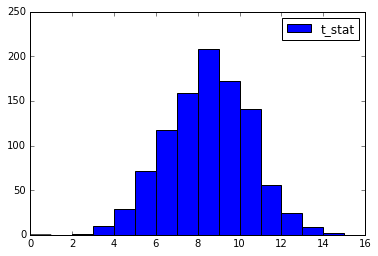

In [6]:
pylab.hist(t_stat, bins = 16, color = 'b', range = (0, 16), label = 't_stat')
pylab.legend()

Нулевое распределение статистики — биномиальное $Bin(n, 0.5)$

## Двусторонняя альтернатива

**гипотеза $H_1$** - Джеймс Бонд предпочитает какой-то определённый вид мартини.

In [7]:
stats.binom_test(12, 16, 0.5, alternative = 'two-sided')

0.076812744140625

In [8]:
stats.binom_test(13, 16, 0.5, alternative = 'two-sided')

0.021270751953125

## Односторонняя альтернатива

**гипотеза $H_1$** - Джеймс Бонд предпочитает смешанный напиток.

In [9]:
stats.binom_test(12, 16, 0.5, alternative = 'greater')

0.0384063720703125

In [10]:
stats.binom_test(11, 16, 0.5, alternative = 'greater')

0.10505676269531246

In [11]:
current = np.zeros(100)

In [12]:
current[0:67] = 1

In [14]:
stats.binom_test(22,50,0.75)

3.4831478978300243e-06

In [16]:
import pandas as pd


In [17]:
pdata = pd.read_csv('pines.txt', sep = '\t')

In [28]:
pdata

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4
5,182.5,47.2
6,166.1,48.8
7,160.7,42.1
8,162.9,29.0
9,166.4,33.6


In [40]:
a = stats.binned_statistic_2d(pdata.sn, pdata.we, np.ones(pdata.shape[0]), bins = 5, statistic = 'sum')

In [41]:
a

BinnedStatistic2dResult(statistic=array([[ 18.,  26.,  29.,  25.,  20.],
       [ 14.,  12.,  22.,  34.,  25.],
       [ 12.,  24.,  15.,  50.,  37.],
       [  8.,  19.,  31.,  50.,   7.],
       [  7.,   8.,  37.,  27.,  27.]]), x_edge=array([   0.,   40.,   80.,  120.,  160.,  200.]), y_edge=array([   0.,   40.,   80.,  120.,  160.,  200.]), binnumber=array([36, 36, 36, 36, 37, 37, 37, 37, 36, 36, 36, 29, 30, 29, 30, 29, 29,
       29, 29, 29, 22, 22, 22, 22, 22, 29, 30, 30, 23, 23, 22,  8,  8,  8,
        8,  8,  8,  8, 15, 15,  8, 15, 15,  9,  9,  9,  9,  9,  9,  9,  9,
        8,  8,  9,  9,  9,  8,  8,  8,  8,  9,  9, 16, 16, 17, 16, 17, 17,
       17,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 17, 17, 10, 10, 10, 10,
       10, 10, 10, 24, 24, 23, 23, 23, 23, 24, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 30, 23, 23, 23, 23, 30, 30, 23, 23, 30, 30, 31, 30, 30,
       30, 22, 22, 22, 15, 22, 22, 22, 15, 15, 16, 16, 15, 15, 15, 15, 15,
       15, 15, 38, 38, 38, 38, 38, 38, 38, 

In [49]:
mean = np.mean(a.statistic)

In [45]:
a.statistic.sum()

584.0

In [51]:
b = np.zeros(a.statistic.shape)
b[:,:] = mean

In [54]:
stats.chisquare(a.statistic.flatten(), b.flatten(), ddof = 1)

Power_divergenceResult(statistic=150.58904109589042, pvalue=9.8780617882088893e-21)